# PREDICTION USING DECISION TREE ALGORITHM

In [ ]:
By: Madhunisha M V

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# Data Exploration

In [4]:
# Load the dataset using Pandas
data = pd.read_csv("C:\\Users\\kmpvi\\Documents\\ML Project\\iris.csv")

# Display the first few rows of the dataset and its columns
print("First few rows of the dataset:")
data.head()


First few rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print("\nDataset columns:")
print(data.columns)
print("\nDataset shape:")
print(data.shape)
print("\nDataset information:")
print(data.info())


Dataset columns:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Dataset shape:
(150, 5)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# Data Summary

In [6]:
# Summary statistics
summary = data.describe()
summary

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Central Tendency Measures

In [7]:
# Central tendency measures calculation and printing in a table format for each class
result_data = []
for class_name in data['species'].unique():
    class_data = data[data['species'] == class_name]
    for feature in data.columns[:-1]:
        feature_data = class_data[feature]
        mean_value = feature_data.mean()
        median_value = feature_data.median()
        mode_value = feature_data.mode().iloc[0] if not feature_data.mode().empty else float('nan')
        std_dev_value = round(feature_data.std(), 2)
        variance_value = round(feature_data.var(), 2)
        mid_range_value = (feature_data.min() + feature_data.max()) / 2
        result_data.append([class_name, feature, mean_value, median_value, mode_value, std_dev_value, variance_value, mid_range_value])

columns = ['Class', 'Feature', 'Mean', 'Median', 'Mode', 'Std_Dev', 'Var', 'Mid_Range']
result_df = pd.DataFrame(result_data, columns=columns)

for class_name in data['species'].unique():
    class_table = result_df[result_df['Class'] == class_name]
    print(f"\nTable for Class: {class_name}")
    print(class_table)


Table for Class: setosa
    Class       Feature   Mean  Median  Mode  Std_Dev   Var  Mid_Range
0  setosa  sepal_length  5.006     5.0   5.0     0.35  0.12       5.05
1  setosa   sepal_width  3.428     3.4   3.4     0.38  0.14       3.35
2  setosa  petal_length  1.462     1.5   1.4     0.17  0.03       1.45
3  setosa   petal_width  0.246     0.2   0.2     0.11  0.01       0.35

Table for Class: versicolor
        Class       Feature   Mean  Median  Mode  Std_Dev   Var  Mid_Range
4  versicolor  sepal_length  5.936    5.90   5.5     0.52  0.27       5.95
5  versicolor   sepal_width  2.770    2.80   3.0     0.31  0.10       2.70
6  versicolor  petal_length  4.260    4.35   4.5     0.47  0.22       4.05
7  versicolor   petal_width  1.326    1.30   1.3     0.20  0.04       1.40

Table for Class: virginica
        Class       Feature   Mean  Median  Mode  Std_Dev   Var  Mid_Range
8   virginica  sepal_length  6.588    6.50   6.3     0.64  0.40       6.40
9   virginica   sepal_width  2.974    

# Histogram

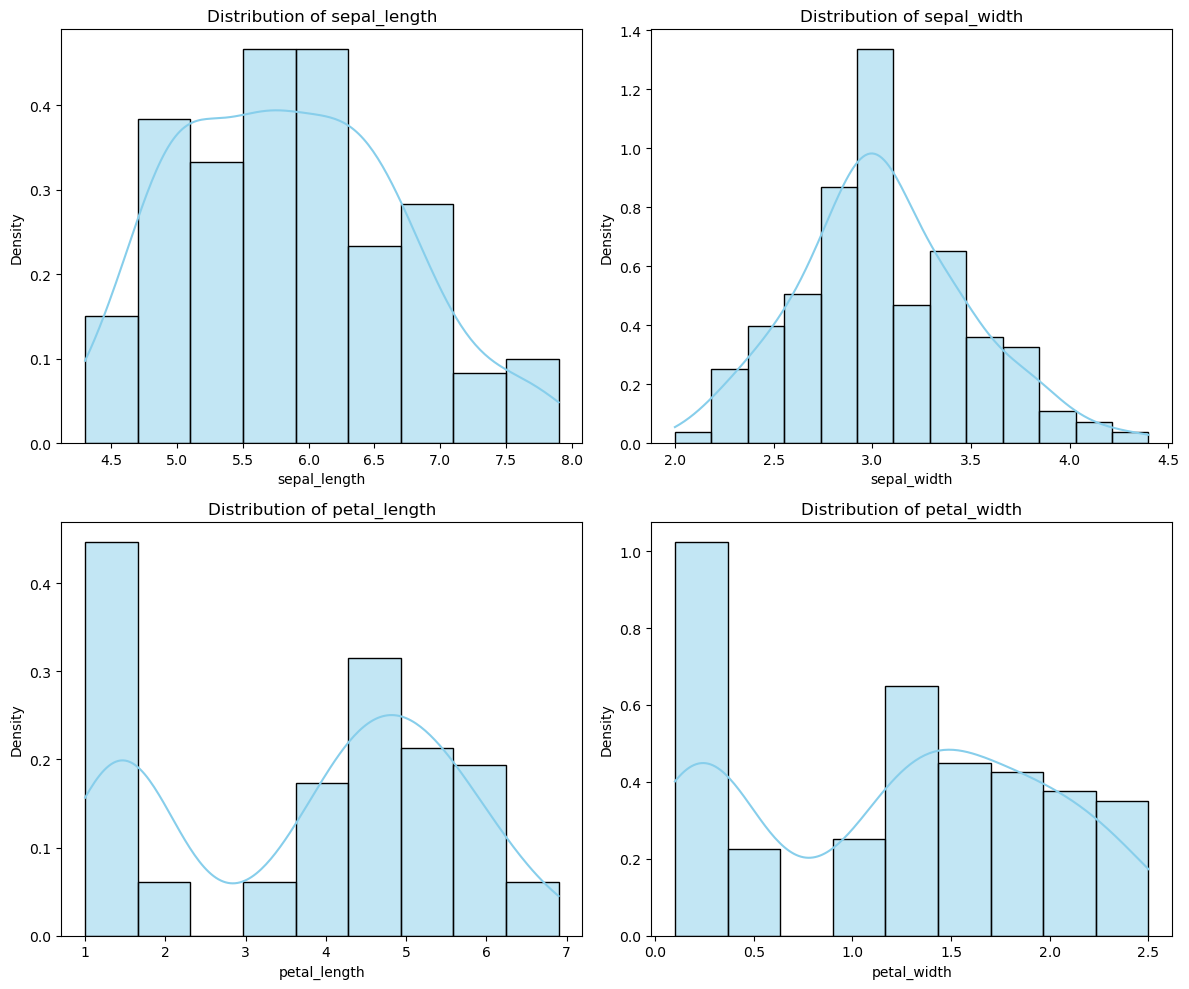

In [8]:
# Visualize the distribution of each feature using histograms with curve indicating the ups and downs
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], kde=True, stat="density", linewidth=1, color='skyblue')  # Changing histogram color
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


# Pair plot (also called Scatter Plot)

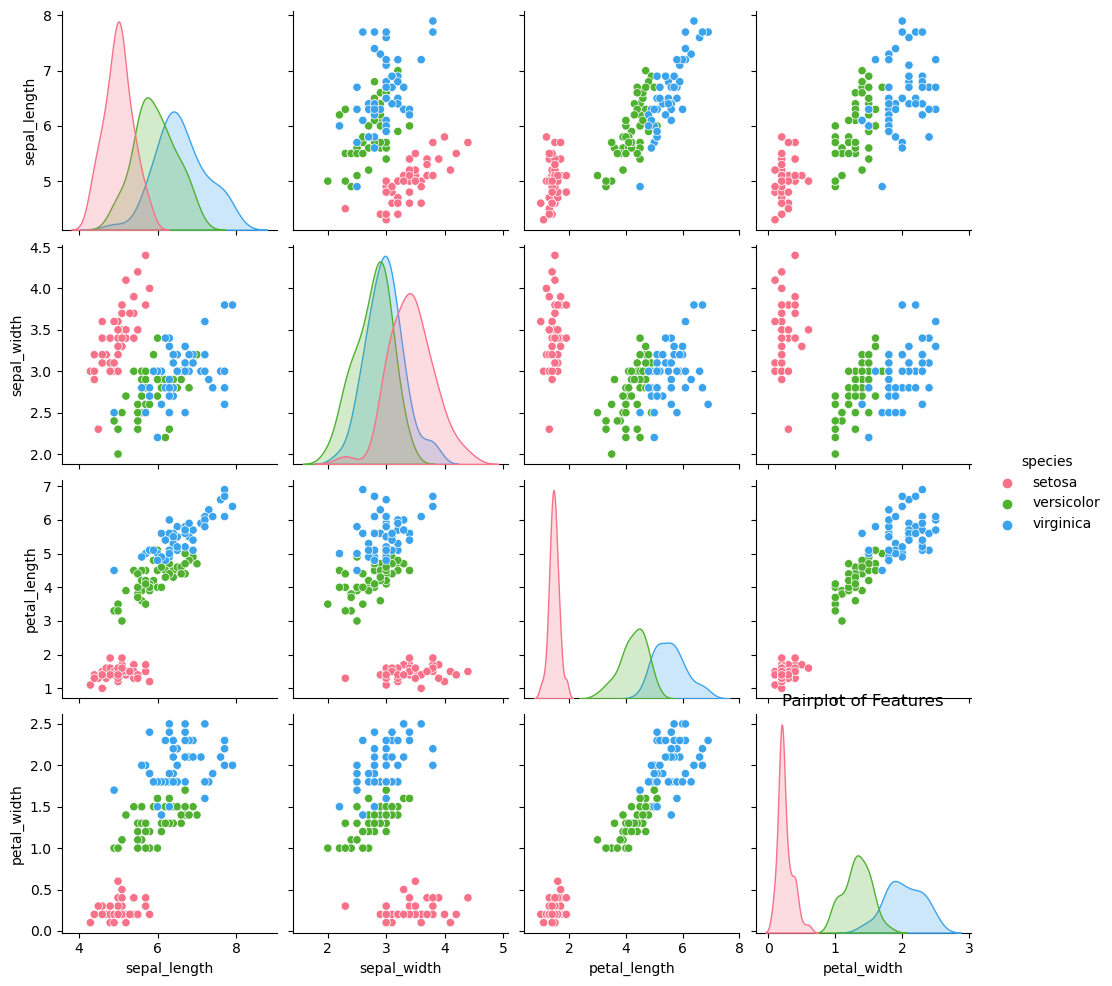

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='species', palette='husl')  # Changing pairplot color palette
plt.title('Pairplot of Features')
plt.show()

# Violin Plot

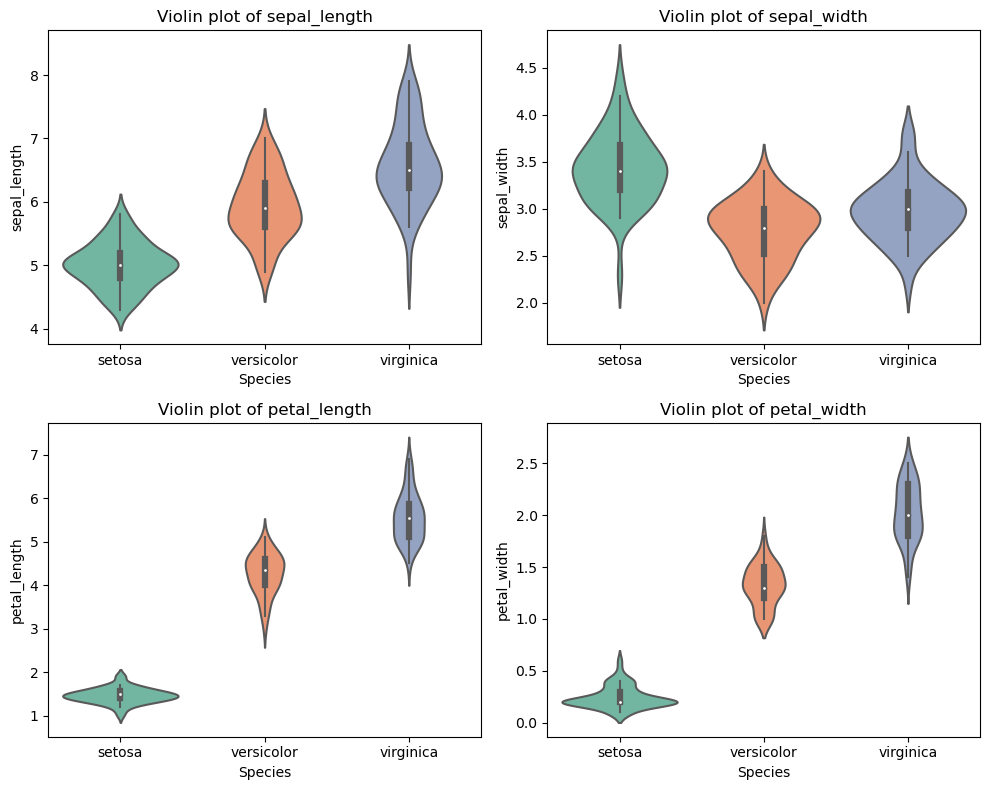

In [10]:
# Visualize distribution using violin plots
plt.figure(figsize=(10, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=column, data=data, palette='Set2')
    plt.title(f'Violin plot of {column}')
    plt.xlabel('Species')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Box Plot

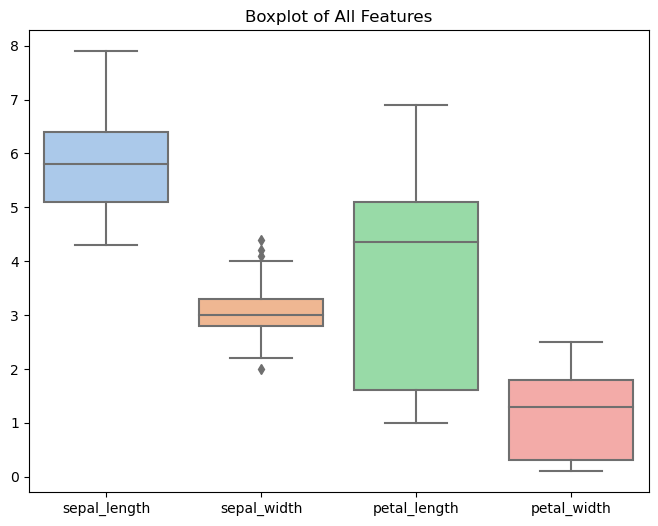

In [11]:
# Visualize outliers using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette='pastel')  # Changing boxplot color palette
plt.title('Boxplot of All Features')
plt.show()

# Correlation Matrix

C:\Users\kmpvi\AppData\Local\Temp\ipykernel_17436\2044841033.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


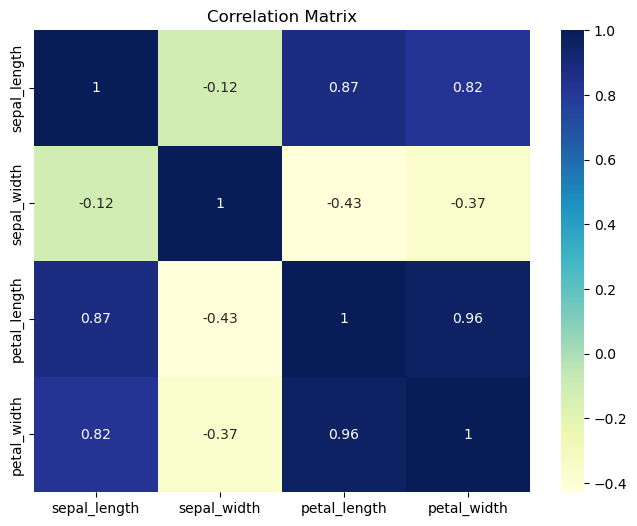

In [12]:
# Calculate and visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')  # Changing heatmap color
plt.title('Correlation Matrix')
plt.show()

# Decision Tree model for prediction

In [15]:
# Split the data into training and testing sets
X = data.drop(columns=['species'])
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nDecision Tree Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)





Decision Tree Classifier Accuracy: 1.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Plotting the decision tree

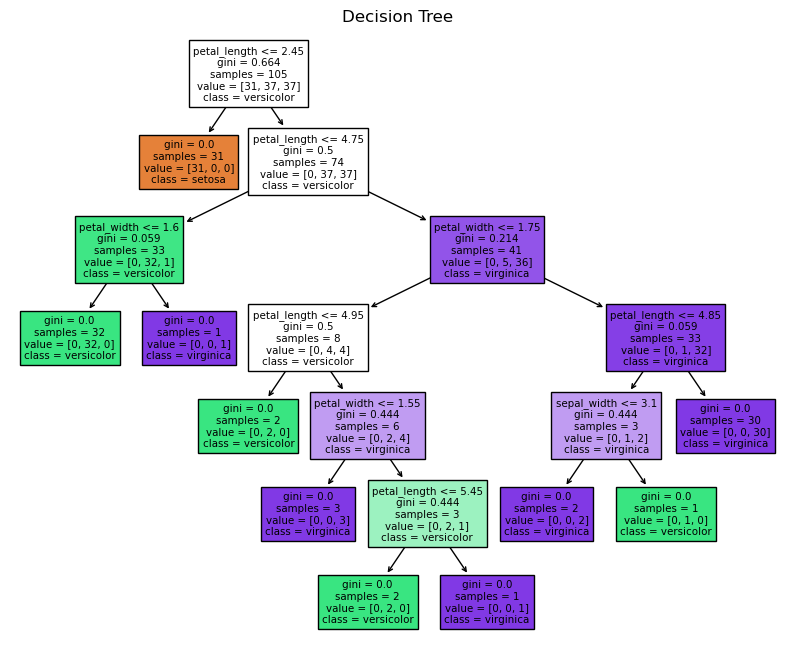

In [16]:
# Plot the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.title("Decision Tree")
plt.show()